# The story of infant mortality around the globe

In this assignment we are going to look deeper into the infant-mortality data around the world and compare more countries. The way this will work is that we present some R-code which implements different instersting visualizations. 

It is not assumed that you fully understand the code yet because it contains R concepts and commands you have not
yet learned. But there are opportuities to play with the code and try out different visualizations under our
guidance. It will help you to understand the power of exploratory data analysis and hopefully motivates you
to learn mor R so you can soon do this analyis yourself.

We first send a command to R via the notebook to load the data we will use in this assigment. Please run the following code by moving the cursor into the cell and type SHIFT enter to execute the command.

## Time trends

In [6]:
library(JWL)
library(ggplot2)

In the next cell you will see a piece of R code. If you run the code, it will produce a particular visualization of the infant mortality rate for a few countries in Africa over time. When you run the code, it will produce a graph. The countries we chose here are Ghana and Kenya. We start our exploration in the year 1960, when these countries gained independence and follow up the most recent datapoints we have. 

Now look at the code and try to guess what you need to change to look at different countries to see how their rate evolved over time. Note - however - that our data are not complete. We do not have data for all countries in the
world. 

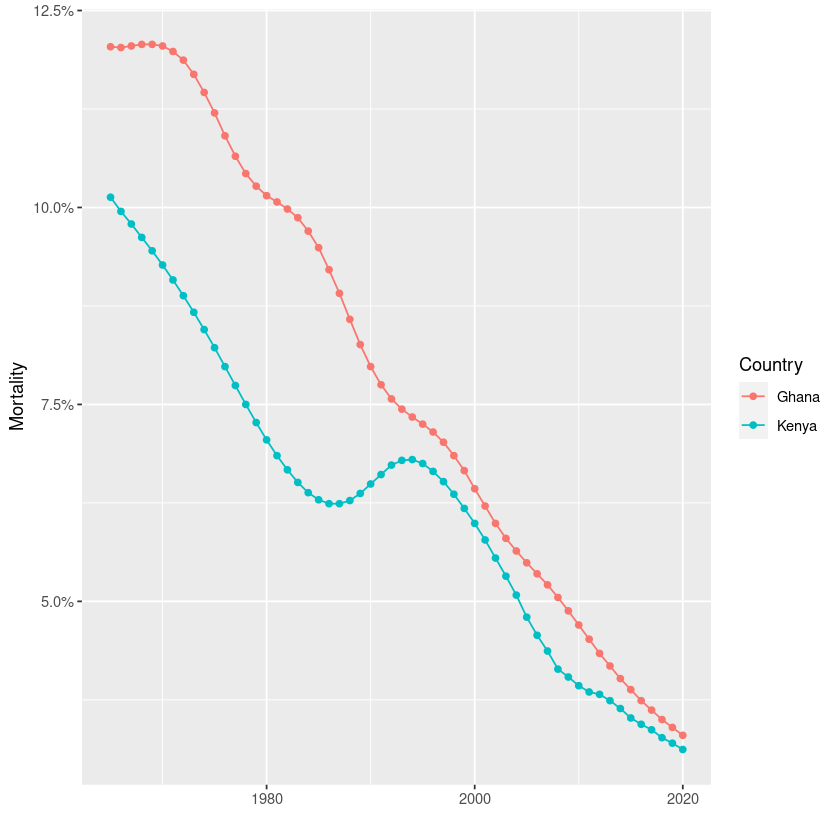

In [2]:

pl_dat <- with(infant_mortality_data, infant_mortality_data[Country %in% c("Ghana","Kenya") & 
                                                            Year >= 1965, ])

p <- ggplot(pl_dat, aes(x = Year, y = Mortality, color = Country)) +
     geom_point() +
     geom_line() +
     xlab("") +
     scale_y_continuous(labels = scales::percent)

p

## Benchmarking Sweden

Now let us compare with a European country that never had a war, Sweden. For Sweden we have longer time series and we can start the exploration earlier, say at 1860, where we started with our table in the lecture notes

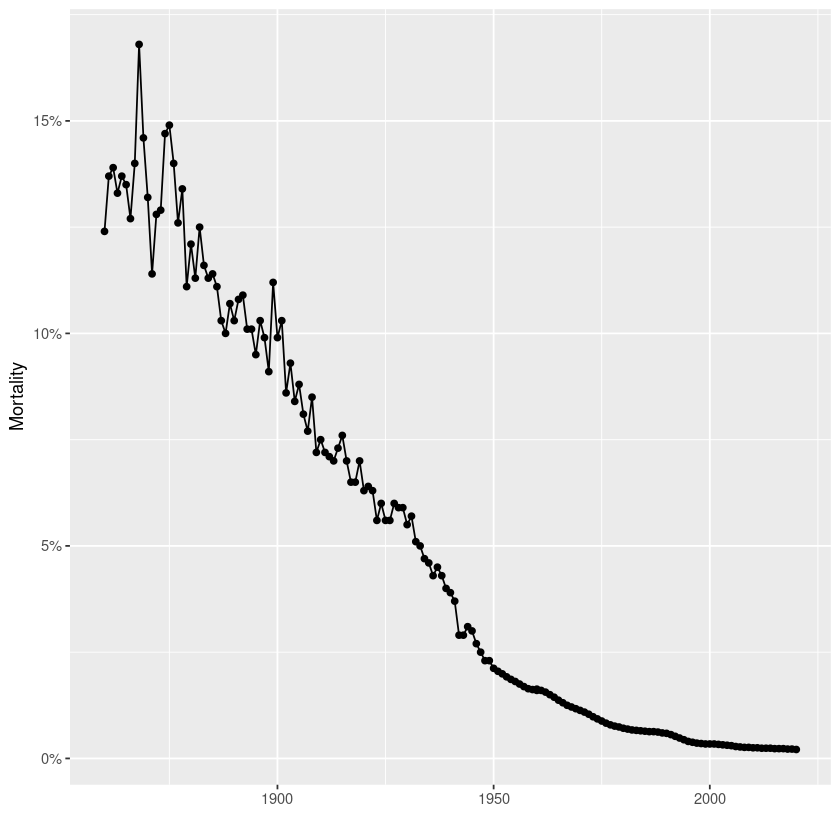

In [3]:
pl_dat_sweden <- with(infant_mortality_data, infant_mortality_data[Country == "Sweden" & 
                                                            Year >= 1860, ])

p <- ggplot(pl_dat_sweden, aes(x = Year, y = Mortality)) +
     geom_point() +
     geom_line() +
     xlab("")+
     scale_y_continuous(labels = scales::percent)

p

We do not yet know enough of R to do the computation exactly. Clearly Sweden has one of the lowest infant mortality rates in the world. But if you look at the rate at which infant mortality was reduced over time, when you compare to most other countries in the so called developped world, what would you say based on your visual
impression?

Now here are the numbers from 1950 to 1990:

In [4]:
se  <- with(infant_mortality_data, infant_mortality_data[Country == "Sweden" & 
                                                            Year >= 1980 & Year <= 1990, 
                                                  c("Country", "Year", "Mortality")])
gh  <- with(infant_mortality_data, infant_mortality_data[Country == "Ghana" & 
                                                            Year >= 1980 & Year <= 1990, 
                                                  c("Country", "Year", "Mortality")])

cbind(se,gh)

Country,Year,Mortality,Country,Year,Mortality
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Sweden,1980,0.0071,Ghana,1980,0.1015
Sweden,1981,0.0069,Ghana,1981,0.1007
Sweden,1982,0.0067,Ghana,1982,0.0998
Sweden,1983,0.0066,Ghana,1983,0.0987
Sweden,1984,0.0065,Ghana,1984,0.0970
Sweden,1985,0.0064,Ghana,1985,0.0949
Sweden,1986,0.0063,Ghana,1986,0.0921
Sweden,1987,0.0063,Ghana,1987,0.0891
Sweden,1988,0.0062,Ghana,1988,0.0858


What reduction of infant mortality did Sweden achieve in each year in this time span in percent? How does this
compare to Ghana?

## The bigger picture

Now let us take a broader look at infant mortality and look at a graph that plots the number of children per woman against infant mortality for all the countries in our dataset. Let us start with the year 1970, about 50 years ago.

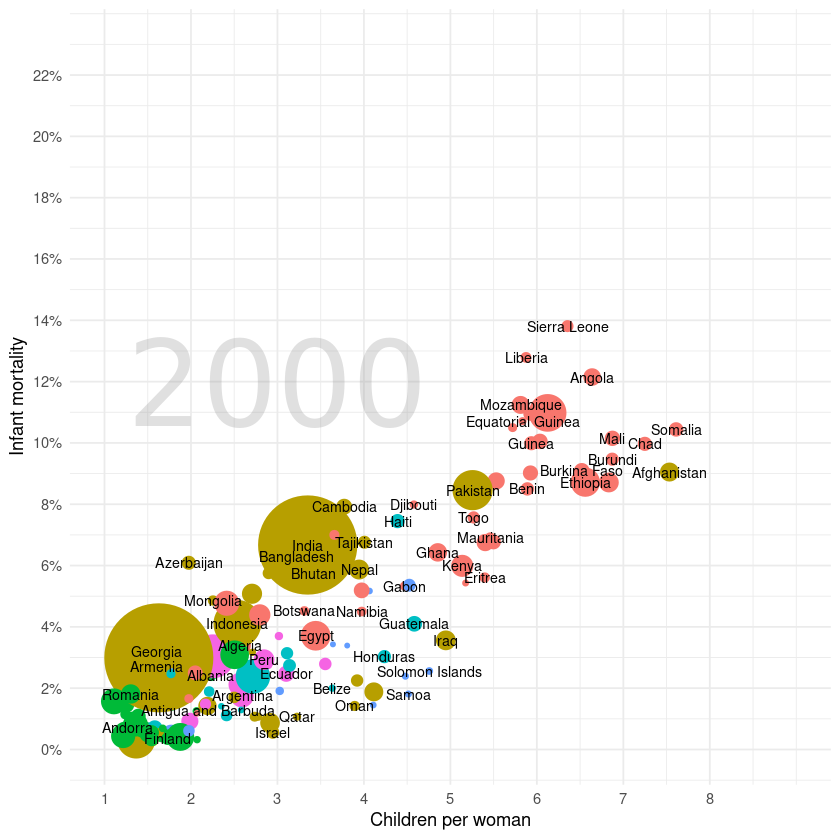

In [8]:
dat_global  <- with(infant_mortality_data, infant_mortality_data[Year == 2000, 
                                                                 c("Country", "Year", "Mortality", "Continent",
                                                                  "Population", "Children")])
                    
pl_gl  <- ggplot(data = dat_global, aes(x = Children, y = Mortality)) +
  geom_point(aes(size = Population, color = Continent))+
   annotate("text", x = 3, y = 0.12, hjust = 0.5,
           size = 25, color = "#999999",
           label = "2000", alpha = .3,
           family = "Helvetica Neue") +
  scale_y_continuous(limits = c(0,0.23), breaks = seq(0, 0.23,by = 0.02), labels = scales::percent)+
  scale_x_continuous(limits = c(1,9), breaks = seq(0,8,by = 1)) +
  scale_size_continuous(range = c(1, 30)) +
  guides(size = "none", color = "none") +
  labs(
    x = "Children per woman",
    y = "Infant mortality"
  ) +
  geom_text(aes(label= Country), size=3, check_overlap = TRUE)+
  theme_minimal()
  
  

pl_gl

What you see in the picture are different countries symbolized by dots, the continent in which these countries are are symbolized by colors and the size of the dots symbolizes the population number of a country. In 1970, you see in the lower right corner almots entirely countries from Europe. They have small family sizes and low infant mortality. In the upper right corner you see predominantly countries from Africa and Asia.

Now try to change the code so you can redraw the picture for 1980, 1990, 2000, 2010 and 2020. What do you see?

This plot clearly looks much fancier than the simple barplots we did ourselves with R. It is done like the famous gapminder charts mad popular by the Swedish physician and health expert Hans Rosling, who also founded the gapminder page. Yet this plot was also done in R. If you continue working on this course, you will soon be able to do charts like this all on your own. Data visualization is a key part of exploring data, one of the key topics in our course. We will touch visualization aspects and how to implement them with R all through the lecture. So stay tuned.